In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [3]:
#Load the dataset
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

In [4]:
# Shape of the dataset
data.shape

(8124, 23)

In [5]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Check for null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Check for duplicate values
data[data.duplicated()].shape

(0, 23)

In [8]:
# Describe the dataset
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Value Counts

In [9]:
columns = data.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
for col in columns:
    print('Column Name: ',col)
    print(data[col].value_counts(),'\n')

Column Name:  class
e    4208
p    3916
Name: class, dtype: int64 

Column Name:  cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

Column Name:  cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

Column Name:  cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

Column Name:  bruises
f    4748
t    3376
Name: bruises, dtype: int64 

Column Name:  odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 

Column Name:  gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64 

Column Name:  gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64 

Column Name:  gill-size
b    5612
n    2512
Name: gill-size, dtype: int64 

Column Name:  gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e

### Compairing different columns w.r.t 'class'

In [11]:
def plot_rate_bar(data,col1,col2):
    
    data_col1 = data.groupby([col1])[col2].value_counts(normalize = True).unstack().reset_index()
    data_col1.fillna(0, inplace = True)

    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    colors = ['#768dc5','#e28743']
    ax1.bar(data_col1[col1], data_col1['p'], label = 'Poisonous', color= colors[0])
    ax1.bar(data_col1[col1], data_col1['e'], label = 'Edible',bottom= data_col1['p'], color= colors[1])
    ax1.set_title('comparision b/w '+col1+' and '+col2, fontsize= 15)
    ax1.set_xlabel(xlabel= col1, fontsize= 10)
    ax1.set_ylabel(ylabel= col2, fontsize= 10)
    ax1.tick_params(axis='both', labelsize=10)
    ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)
    ax1.legend()

    # Let's put the annotations inside the bars

    for rect in ax1.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is also not pixels, it's the
        label_text = '{:.2f}'.format(height)

        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 8)
        
    
    order = data[col1].value_counts().sort_values(ascending=False).index.tolist()
    sns.countplot(x=col1, data=data,hue=col2, order = order, ax = ax2)
    for rect in ax2.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height + 10
        ax2.text(label_x, label_y, round(height), ha='center' ,fontsize= 8)
    ax2.set_title('count plot of '+col1+' based on '+col2, fontsize= 15)
    plt.xticks( rotation = 45, fontsize = 12)

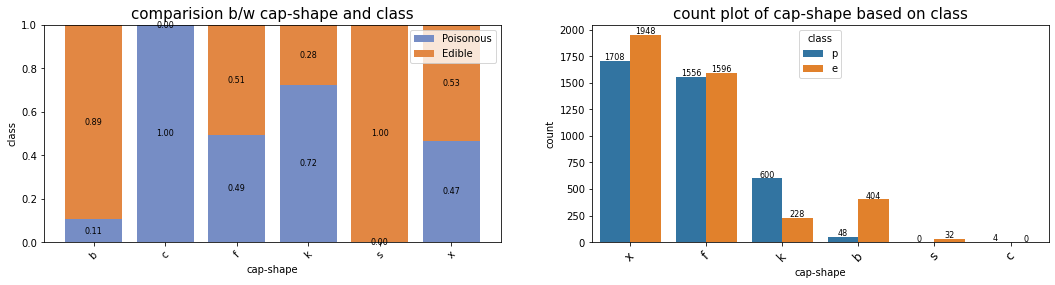

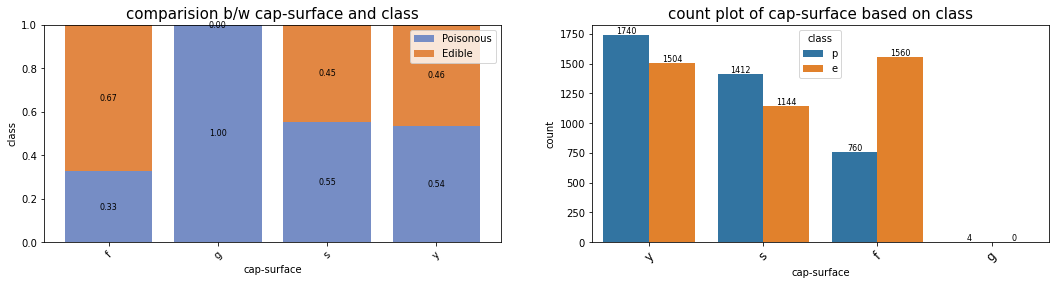

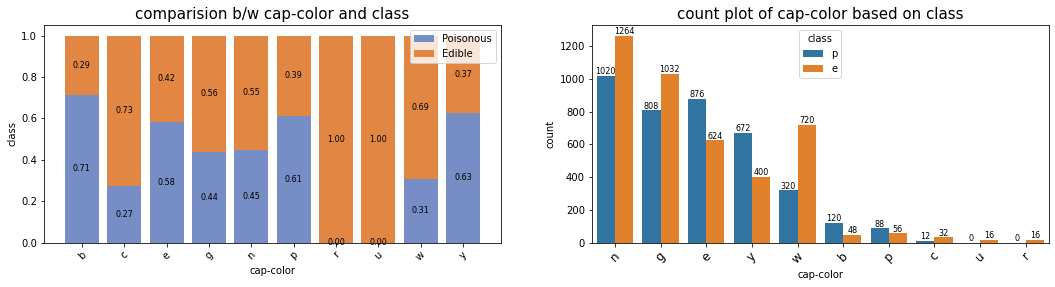

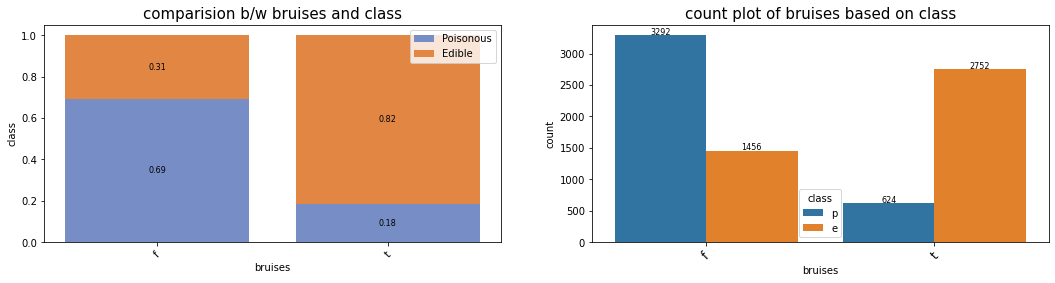

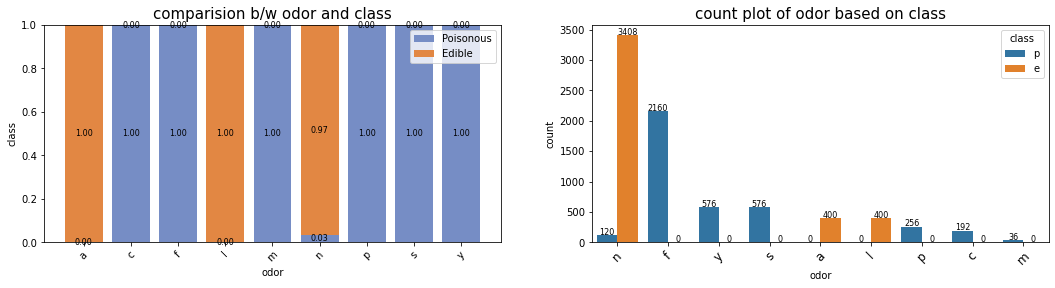

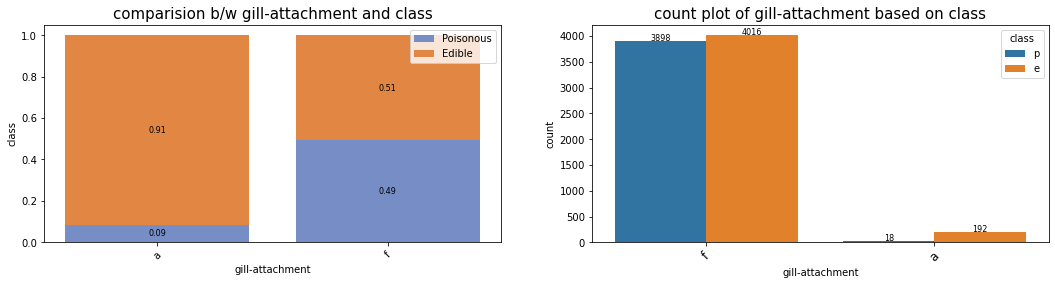

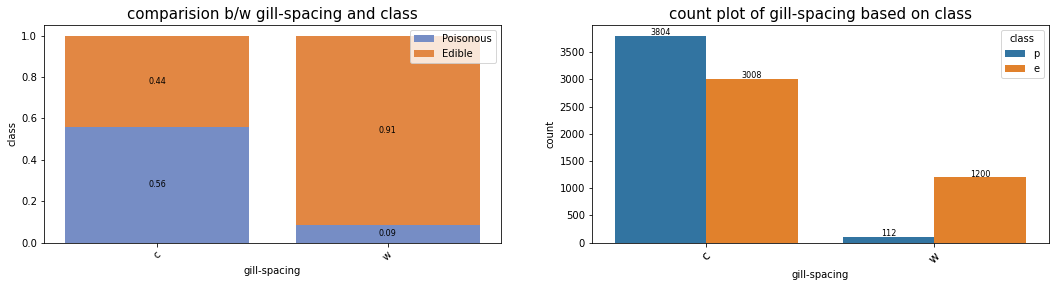

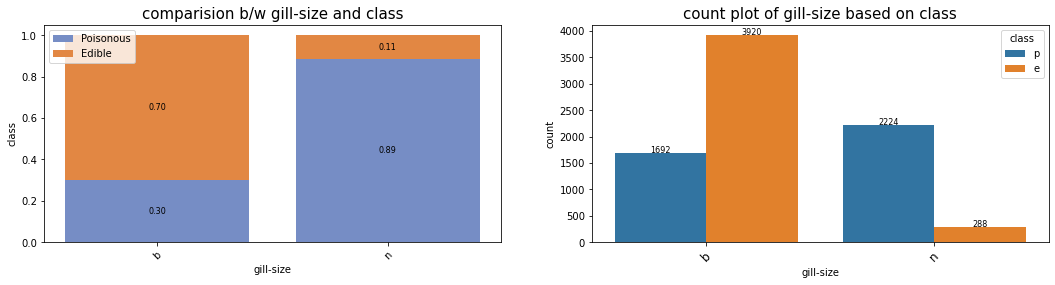

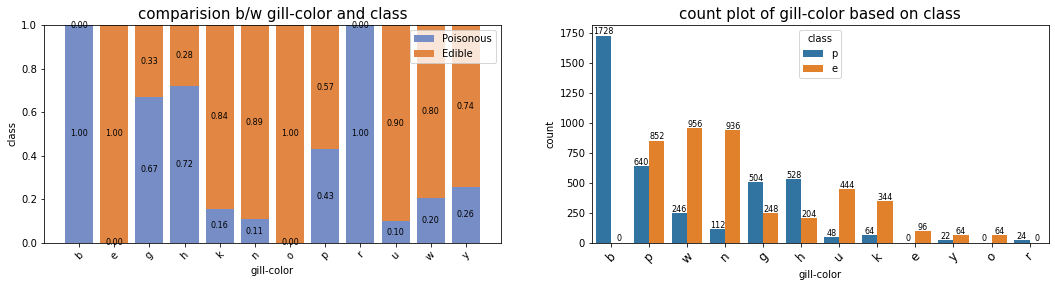

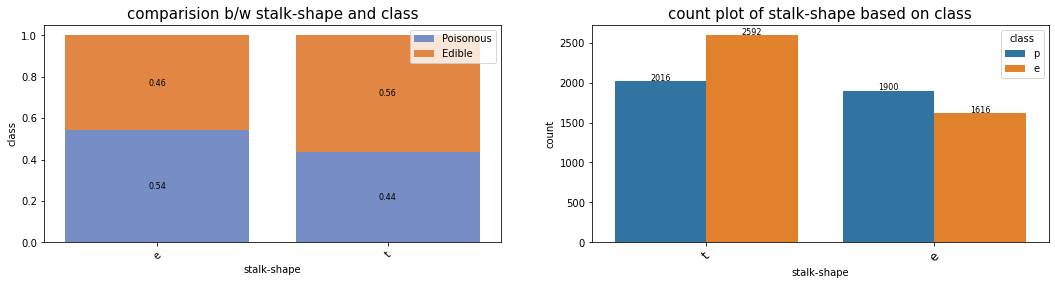

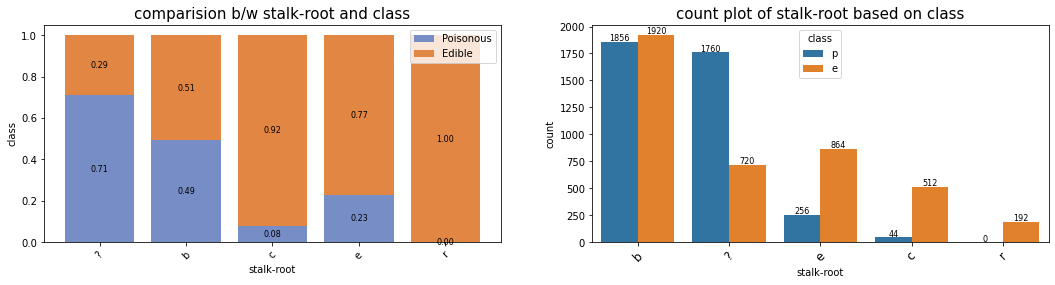

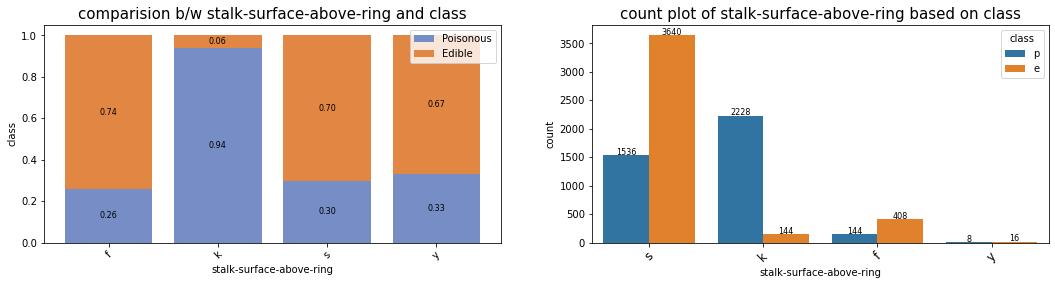

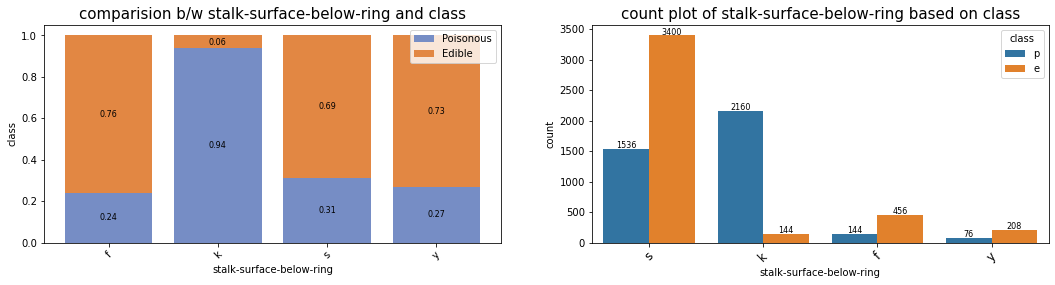

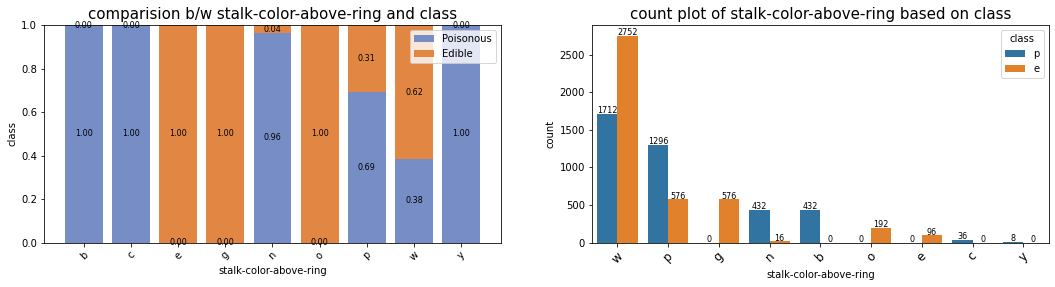

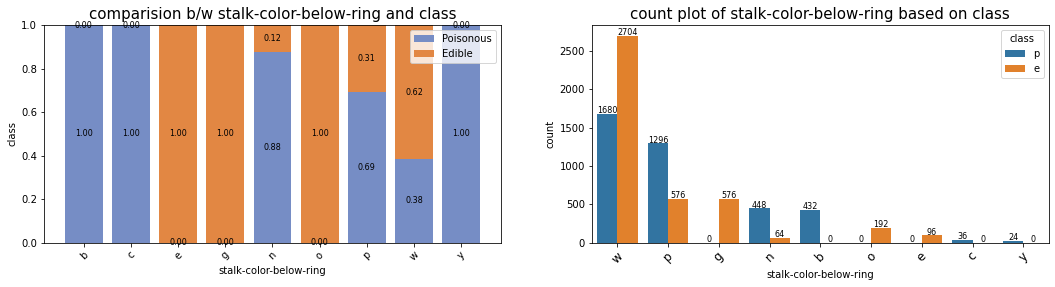

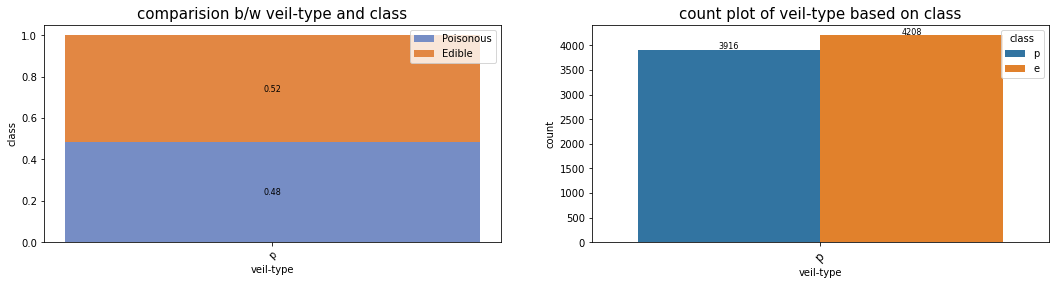

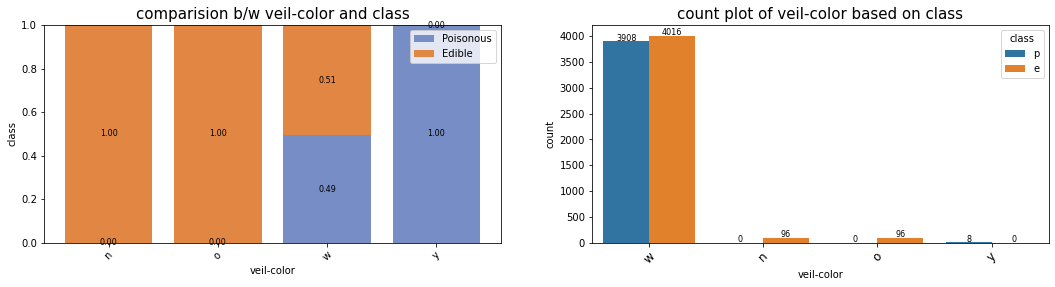

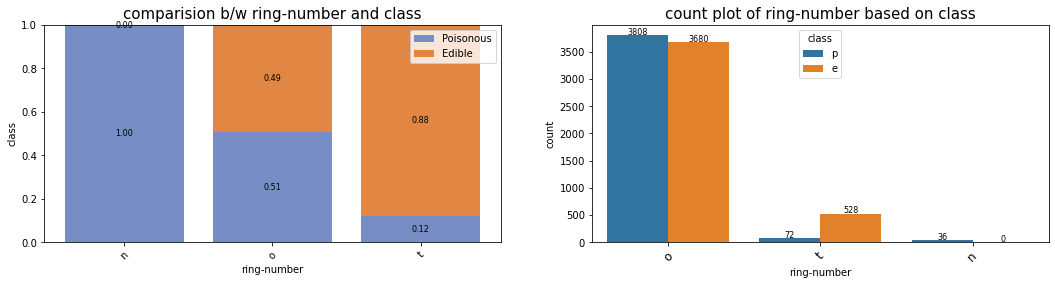

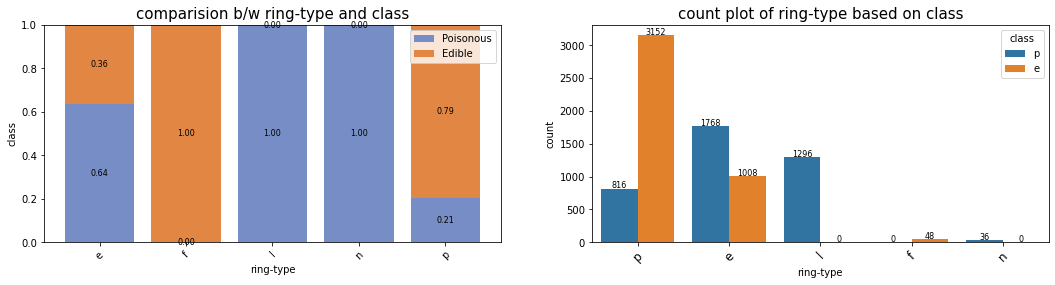

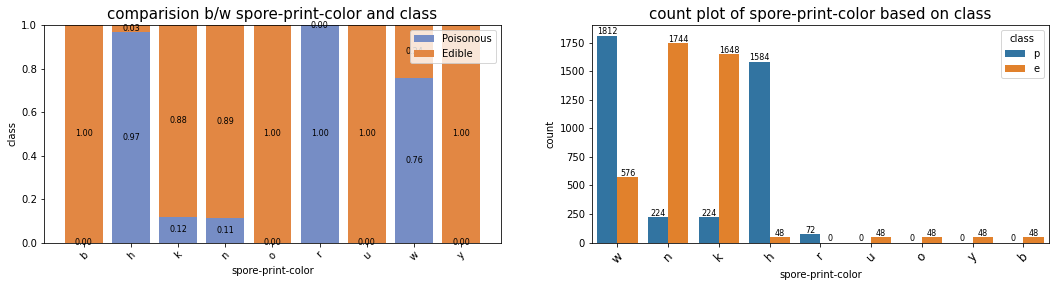

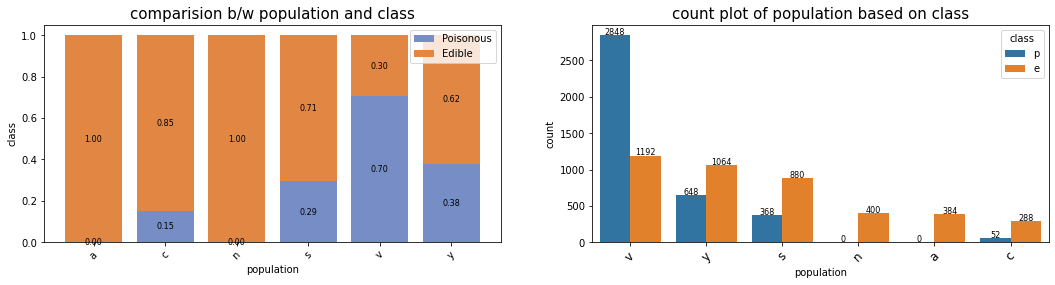

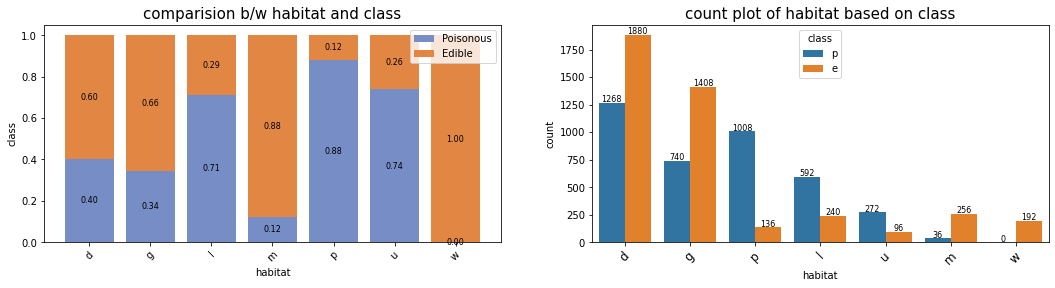

In [12]:
for col in columns[1:]:
    plot_rate_bar(data, col, 'class')

In [24]:
def count_plot(data,col,col2):
    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    
    order = data[col].value_counts().sort_values(ascending=False).index.tolist()
    
    # Plot 1
    sns.countplot(x=col, data=data, order = order, ax = ax1)
    ax1.set_title('count plot of '+col, fontsize= 15)
    ax1.set_xlabel(xlabel= col, fontsize= 10)
    for rect in ax1.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, round(height), ha='center', va='center', fontsize= 10)
        
    # Plot 2
    sns.countplot(x=col, data=data,hue=col2, order = order, ax = ax2)
    for rect in ax2.patches:
        height = rect.get_height()
        if np.isnan(height):
            height = 0
        width = rect.get_width()
        if np.isnan(width):
            width = 0
        x = rect.get_x()
        y = rect.get_y()
        label_x = x + width / 2
        label_y = y + height + 10
        ax2.text(label_x, label_y, round(height), ha='center' ,fontsize= 8)
    ax2.set_title('count plot of '+col+' based on '+col2, fontsize= 15)
    plt.xticks(fontsize = 12)

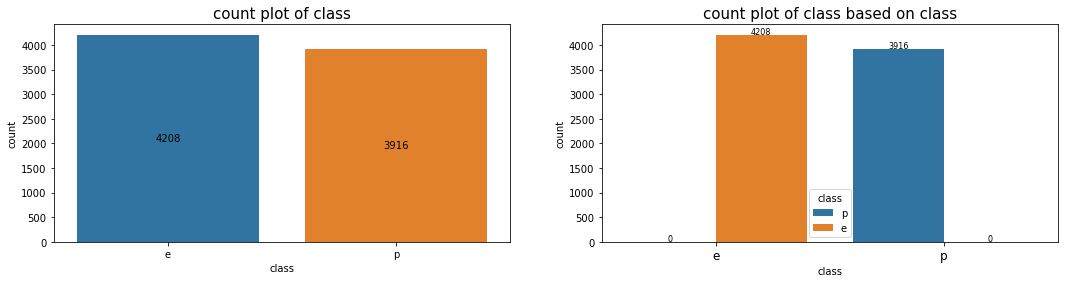

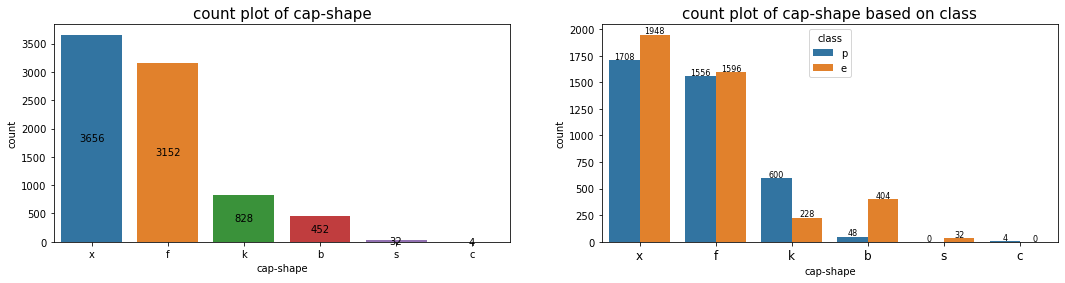

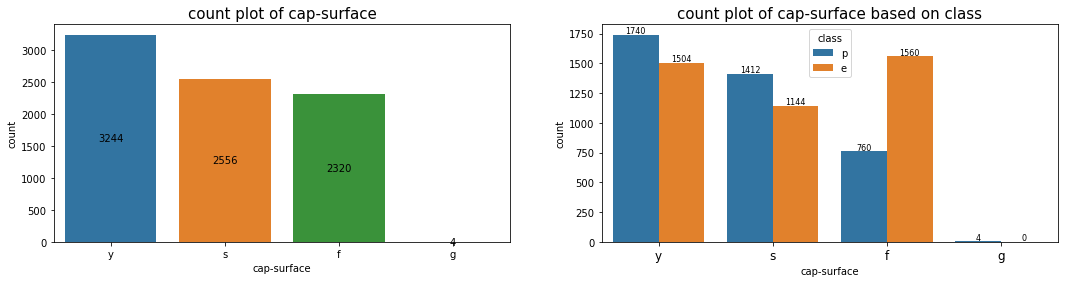

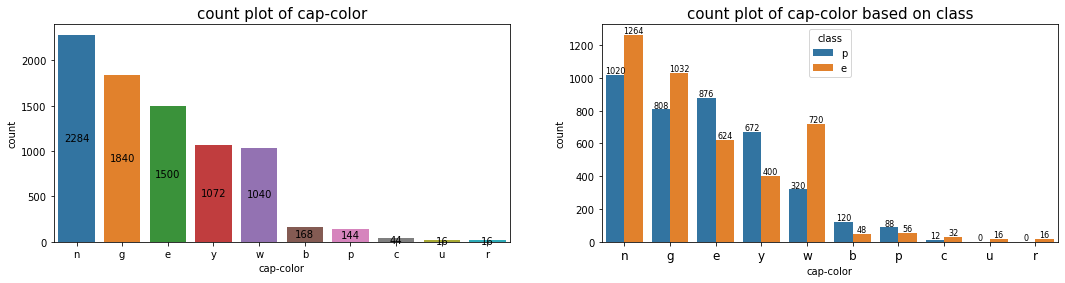

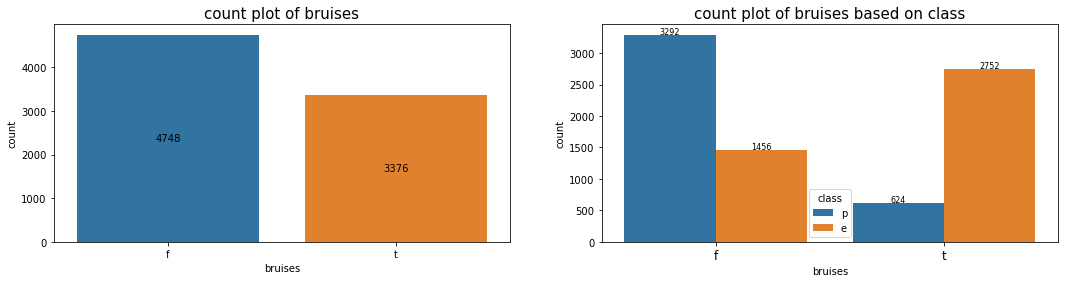

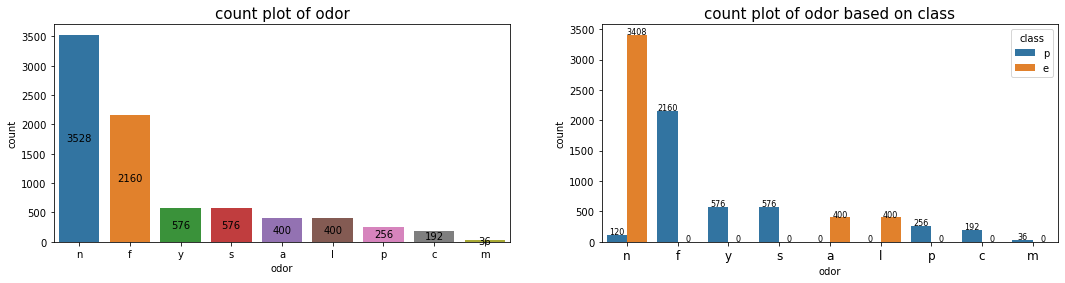

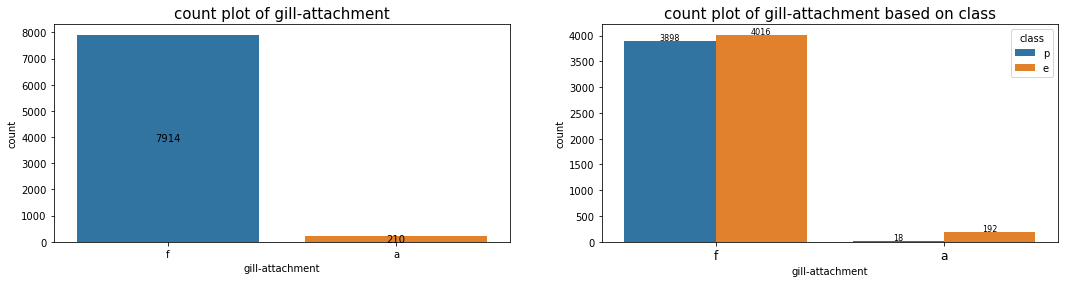

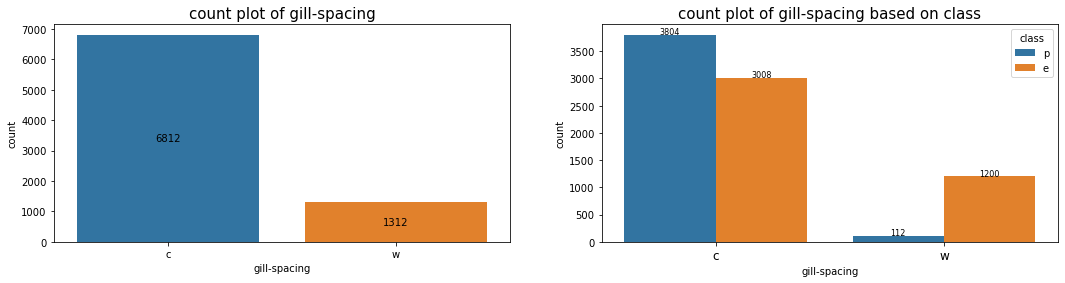

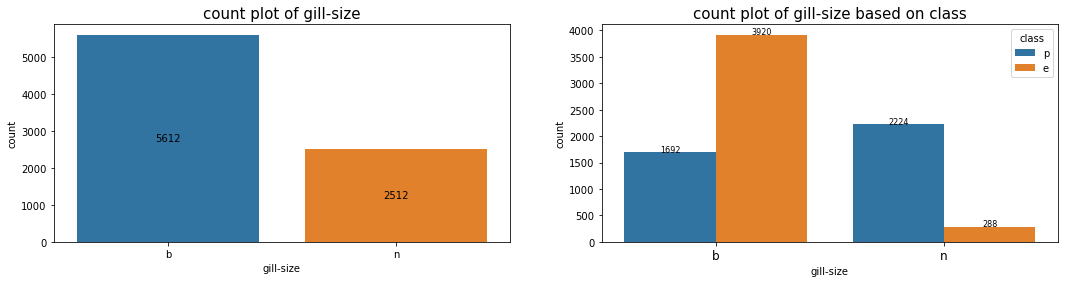

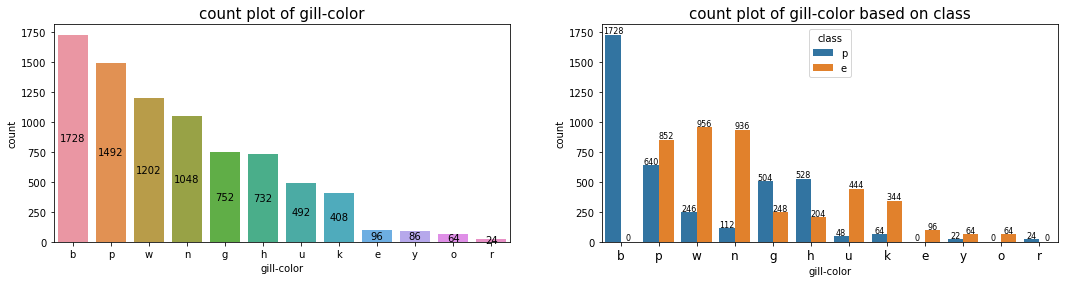

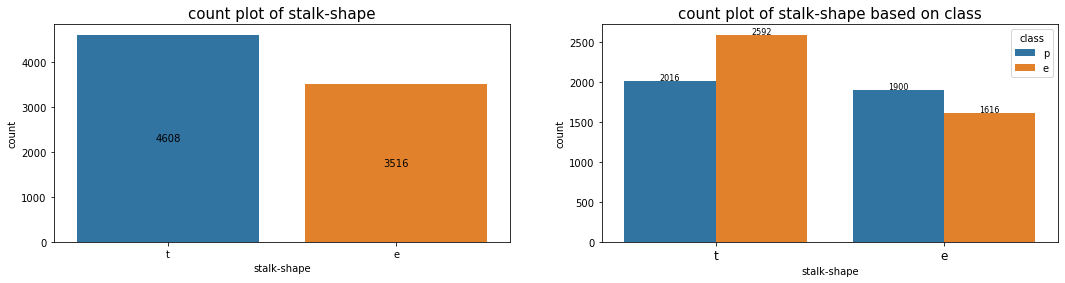

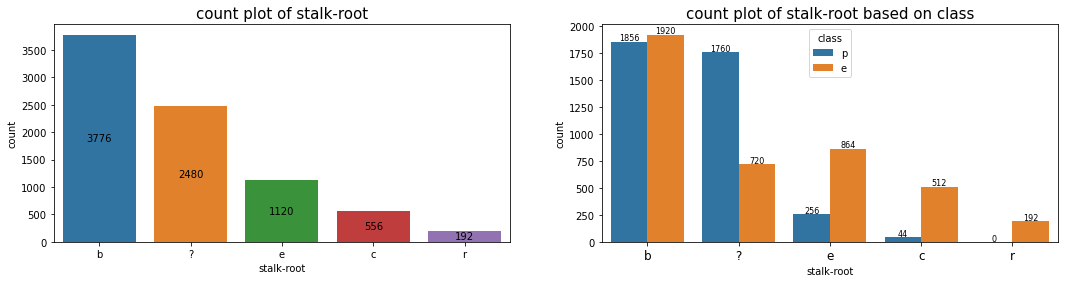

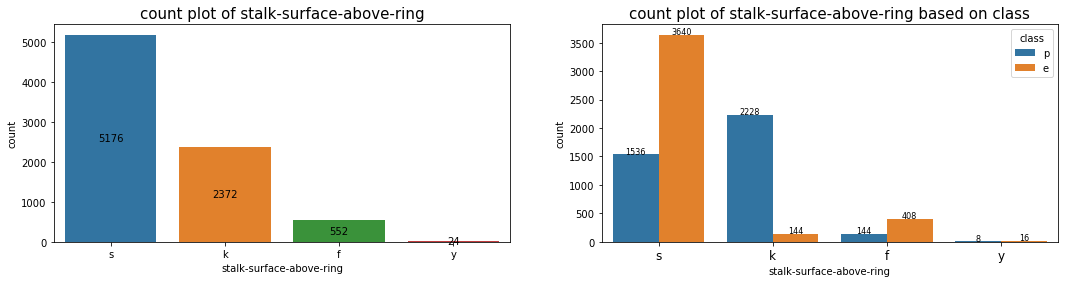

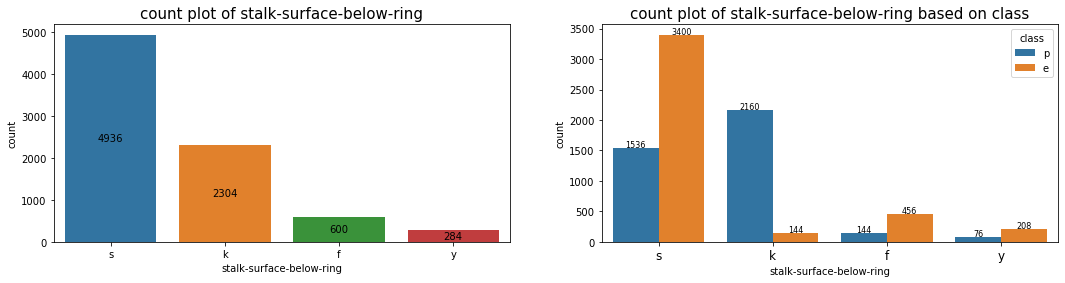

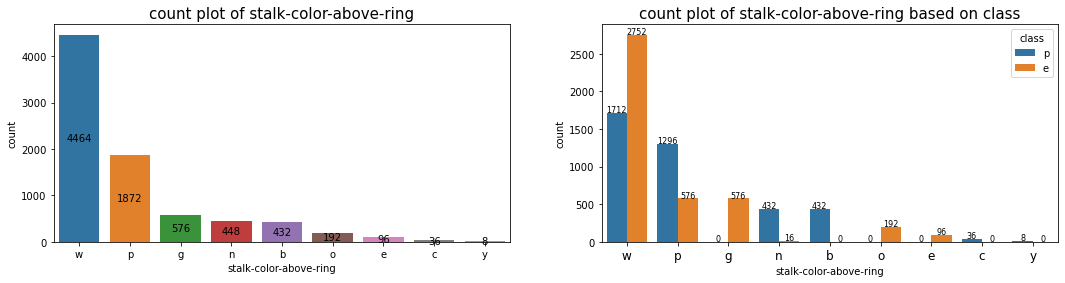

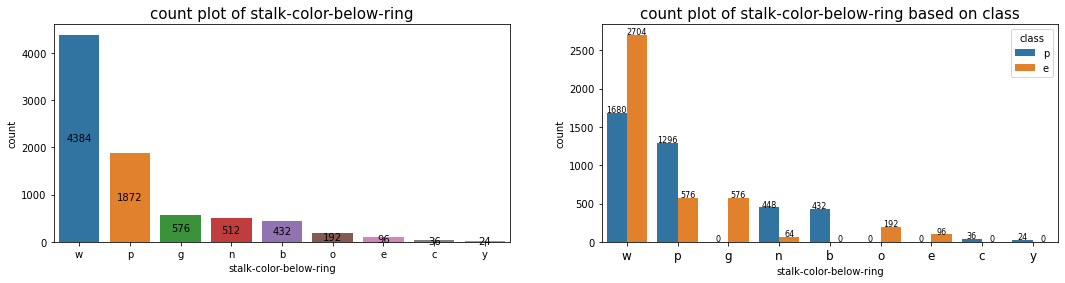

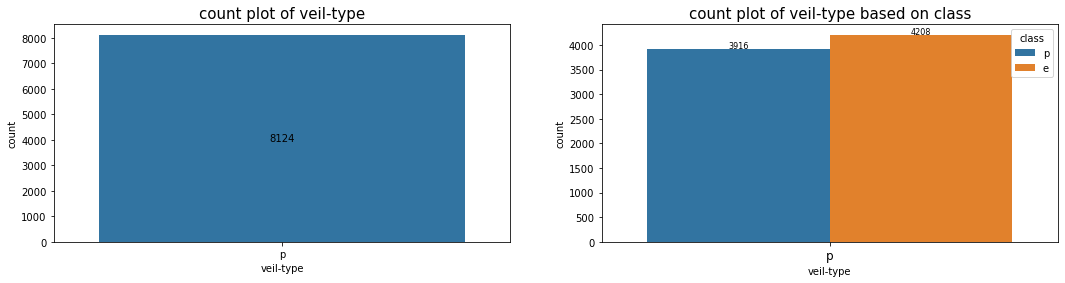

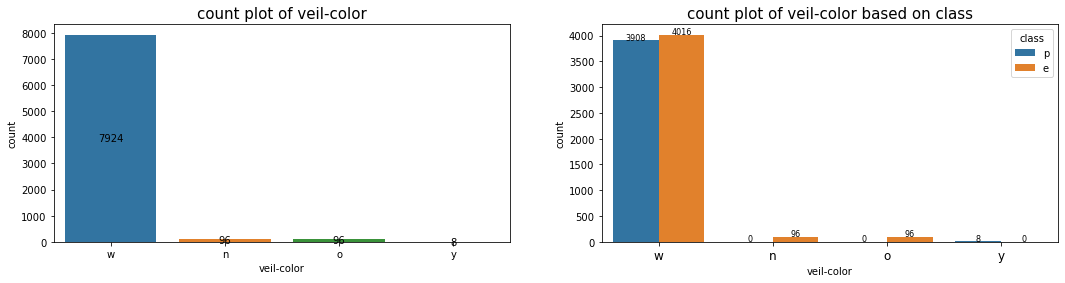

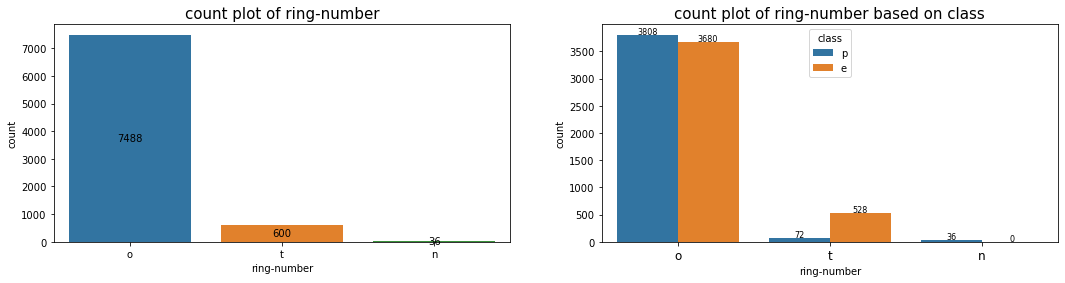

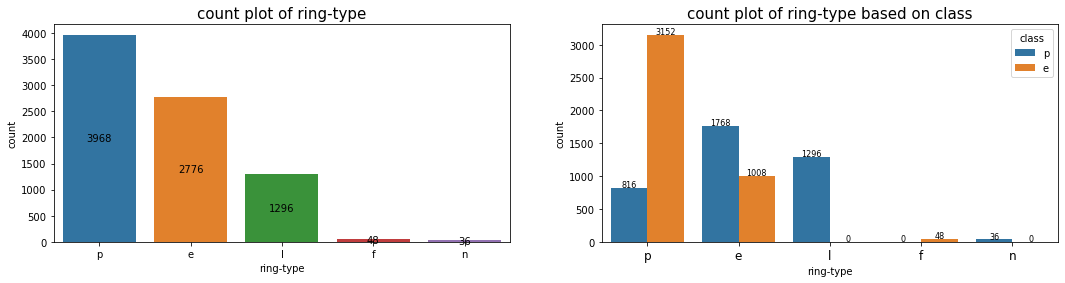

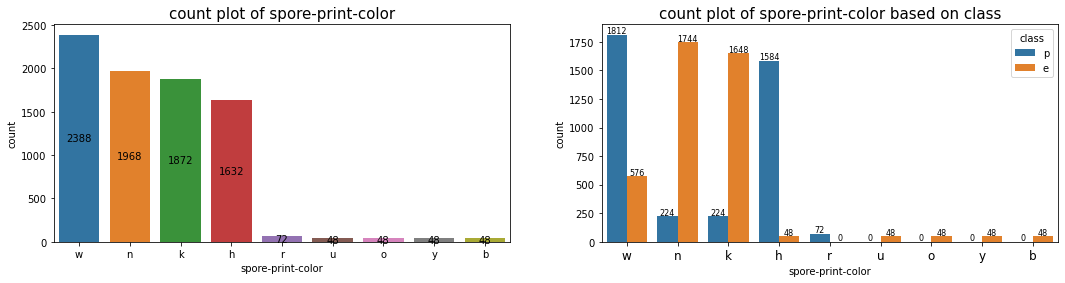

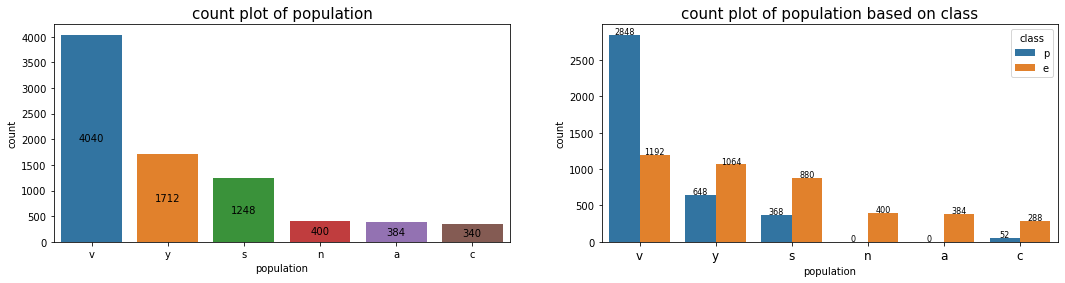

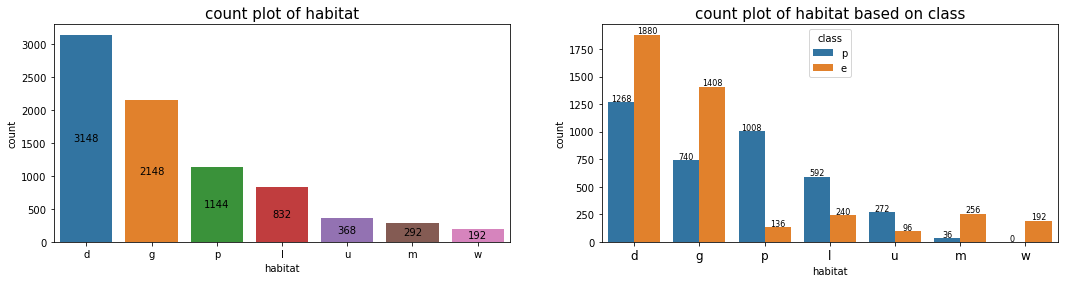

In [25]:
for col in columns:
    count_plot(data, col, 'class')

In [16]:
for col in data.select_dtypes(include='object'):
    display(pd.crosstab(data['class'], data[col], normalize='index'))

class,e,p
class,,
e,1.0,0.0
p,0.0,1.0


cap-shape,b,c,f,k,s,x
class,,,,,,
e,0.096008,0.000000,0.379278,0.054183,0.007605,0.462928
p,0.012257,0.001021,0.397344,0.153218,0.000000,0.436159


cap-surface,f,g,s,y
class,,,,
e,0.370722,0.000000,0.271863,0.357414
p,0.194076,0.001021,0.360572,0.444331


cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,0.011407,0.007605,0.148289,0.245247,0.30038,0.013308,0.003802,0.003802,0.171103,0.095057
p,0.030644,0.003064,0.223698,0.206333,0.26047,0.022472,0.000000,0.000000,0.081716,0.171604


bruises,f,t
class,,
e,0.346008,0.653992
p,0.840654,0.159346


odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,0.095057,0.00000,0.000000,0.095057,0.000000,0.809886,0.000000,0.000000,0.000000
p,0.000000,0.04903,0.551583,0.000000,0.009193,0.030644,0.065373,0.147089,0.147089


gill-attachment,a,f
class,,
e,0.045627,0.954373
p,0.004597,0.995403


gill-spacing,c,w
class,,
e,0.714829,0.285171
p,0.971399,0.028601


gill-size,b,n
class,,
e,0.931559,0.068441
p,0.432074,0.567926


gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0.000000,0.022814,0.058935,0.048479,0.081749,0.222433,0.015209,0.202471,0.000000,0.105513,0.227186,0.015209
p,0.441267,0.000000,0.128703,0.134831,0.016343,0.028601,0.000000,0.163432,0.006129,0.012257,0.062819,0.005618


stalk-shape,e,t
class,,
e,0.384030,0.615970
p,0.485189,0.514811


stalk-root,?,b,c,e,r
class,,,,,
e,0.171103,0.456274,0.121673,0.205323,0.045627
p,0.449438,0.473953,0.011236,0.065373,0.000000


stalk-surface-above-ring,f,k,s,y
class,,,,
e,0.096958,0.034221,0.865019,0.003802
p,0.036772,0.568948,0.392237,0.002043


stalk-surface-below-ring,f,k,s,y
class,,,,
e,0.108365,0.034221,0.807985,0.049430
p,0.036772,0.551583,0.392237,0.019408


stalk-color-above-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.000000,0.000000,0.022814,0.136882,0.003802,0.045627,0.136882,0.653992,0.000000
p,0.110317,0.009193,0.000000,0.000000,0.110317,0.000000,0.330950,0.437181,0.002043


stalk-color-below-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.000000,0.000000,0.022814,0.136882,0.015209,0.045627,0.136882,0.642586,0.000000
p,0.110317,0.009193,0.000000,0.000000,0.114402,0.000000,0.330950,0.429009,0.006129


veil-type,p
class,
e,1.0
p,1.0


veil-color,n,o,w,y
class,,,,
e,0.022814,0.022814,0.954373,0.000000
p,0.000000,0.000000,0.997957,0.002043


ring-number,n,o,t
class,,,
e,0.000000,0.874525,0.125475
p,0.009193,0.972421,0.018386


ring-type,e,f,l,n,p
class,,,,,
e,0.239544,0.011407,0.00000,0.000000,0.749049
p,0.451481,0.000000,0.33095,0.009193,0.208376


spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,0.011407,0.011407,0.391635,0.414449,0.011407,0.000000,0.011407,0.136882,0.011407
p,0.000000,0.404494,0.057201,0.057201,0.000000,0.018386,0.000000,0.462717,0.000000


population,a,c,n,s,v,y
class,,,,,,
e,0.091255,0.068441,0.095057,0.209125,0.283270,0.252852
p,0.000000,0.013279,0.000000,0.093973,0.727273,0.165475


habitat,d,g,l,m,p,u,w
class,,,,,,,
e,0.446768,0.334601,0.057034,0.060837,0.032319,0.022814,0.045627
p,0.323800,0.188968,0.151175,0.009193,0.257406,0.069459,0.000000


# Data Preprocessing

### Encoded using Label Encode

In [17]:
data1 = data.copy()

data1.drop('veil-type', axis=1, inplace=True)
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [18]:
columns = data1.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()

In [20]:
data_lable = data1.apply(lable.fit_transform)
data_lable

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [21]:
data_lable.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

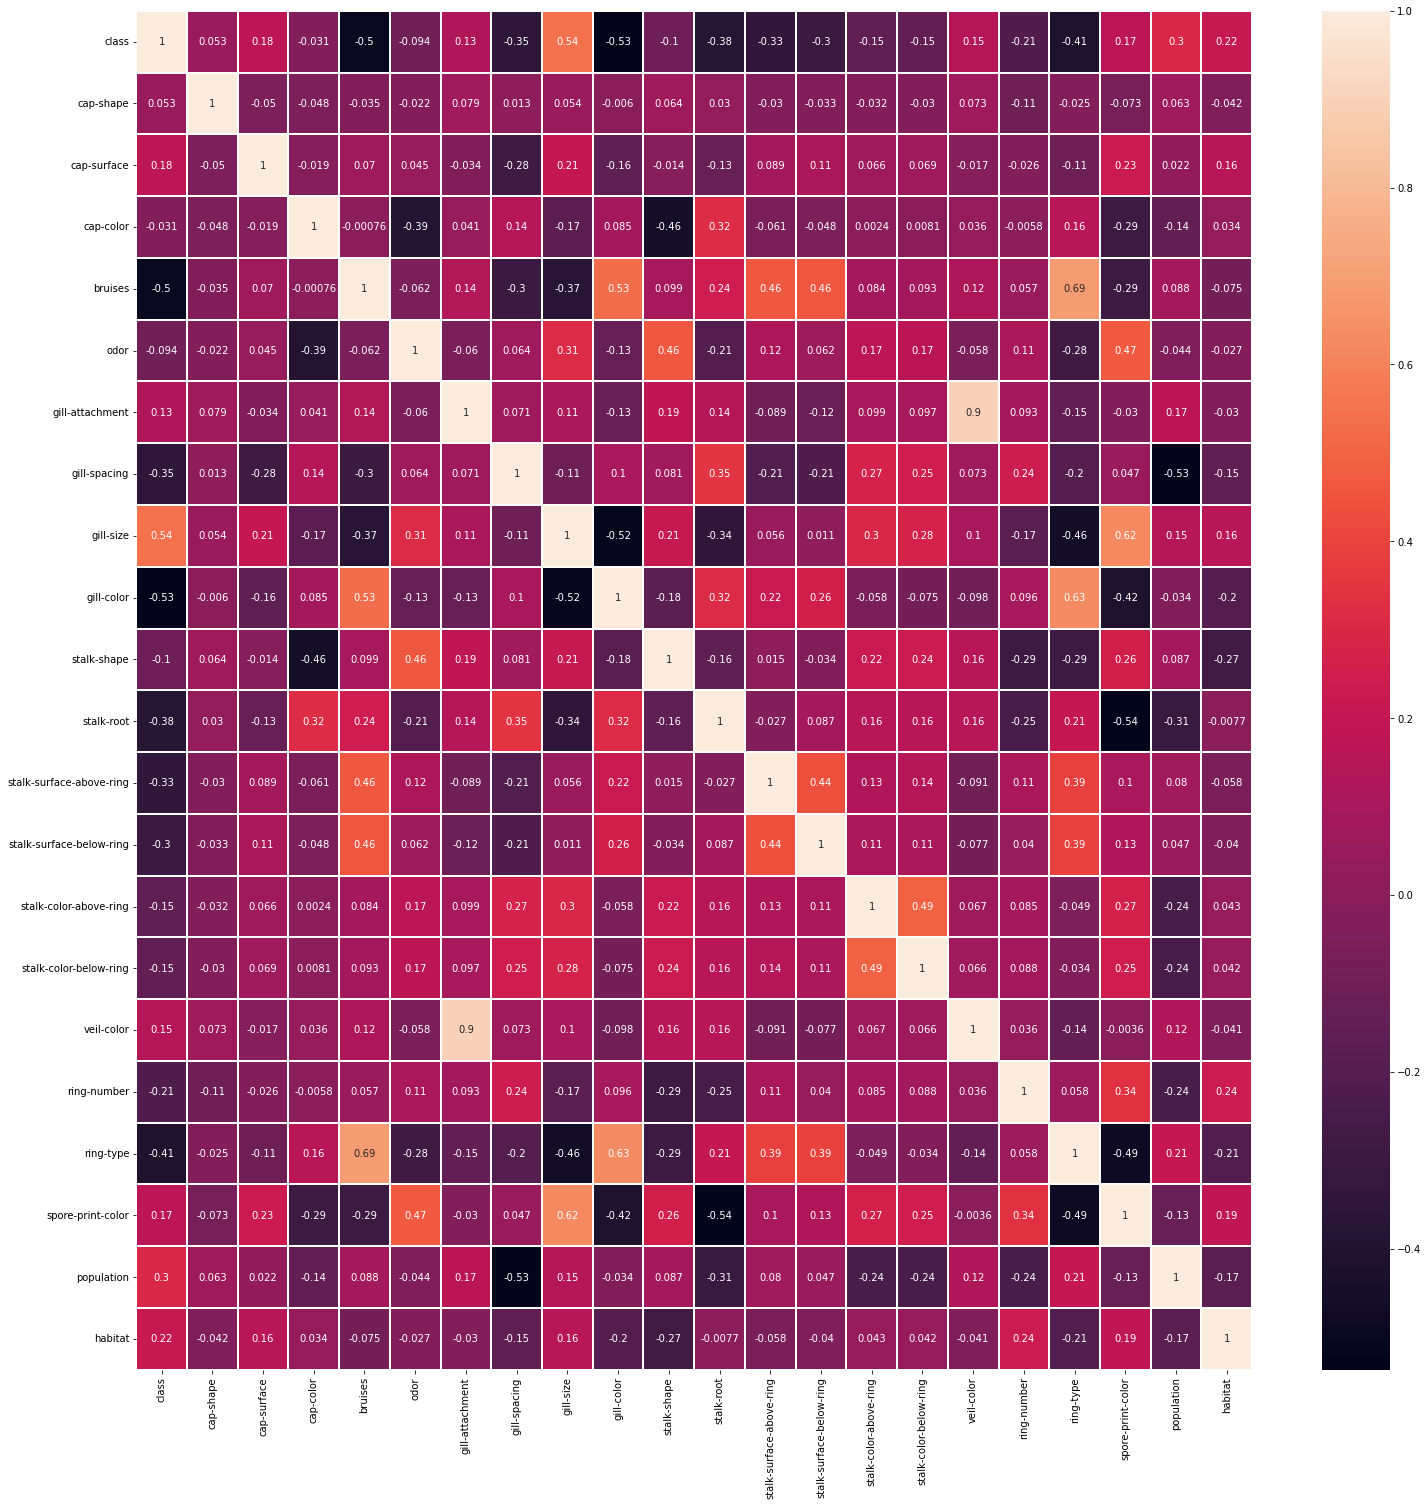

In [22]:
fig, ax = plt.subplots(figsize=(25,25))
# sns.set(rc = {'figure.figsize':(25,28)})
sns.heatmap(data_lable.corr(), annot=True, linewidths=.2, ax=ax)

### Encoded using OneHot Encode

In [23]:
lable = LabelEncoder()

In [24]:
data_onehot = pd.get_dummies(data1.iloc[:,1:])
data_onehot['class'] = lable.fit_transform(data1['class'])
data_onehot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


+ Now, the column which have only 2 class in it we will encode it using Lable Encoding and remaining once using OneHot Encoding

In [25]:
column_2_class = []
column_classes = []
for col in columns:
    if len(data[col].value_counts().index) == 2:
        column_2_class.append(col)
    else:
        column_classes.append(col)

# column_2_class
# column_classes

In [26]:
data_onehot_edit = data1[column_2_class].apply(lable.fit_transform)
data_onehot_edit1 = data_onehot_edit.copy()
data_onehot_edit

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape
0,1,1,1,0,1,0
1,0,1,1,0,0,0
2,0,1,1,0,0,0
3,1,1,1,0,1,0
4,0,0,1,1,0,1
...,...,...,...,...,...,...
8119,0,0,0,0,0,0
8120,0,0,0,0,0,0
8121,0,0,0,0,0,0
8122,1,0,1,0,1,1


In [27]:
data_hot = pd.get_dummies(data1[column_classes])
data_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [28]:
# Method 1 to concat
data_onehot_edit[data_hot.columns.tolist()] = data_hot[data_hot.columns.tolist()]
data_onehot_edit.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Method 2 to concat
data_onehot_edit1 = pd.concat([data_onehot_edit1, data_hot], axis=1)
data_onehot_edit1

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [30]:
data_onehot.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_m,0.374316,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.122077,-0.004286,0.077081,0.039697,...,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.138627
habitat_p,-0.095178,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.086727,-0.008985,-0.039574,0.117915,...,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,0.323346
habitat_u,-0.052871,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.011913,-0.004835,0.117548,-0.100248,...,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,0.112078
habitat_w,-0.037764,-0.003453,-0.017450,0.119003,-0.009784,-0.036493,-0.098365,-0.003453,0.062109,0.031986,...,-0.154742,-0.080392,-0.123748,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.150087


<AxesSubplot:>

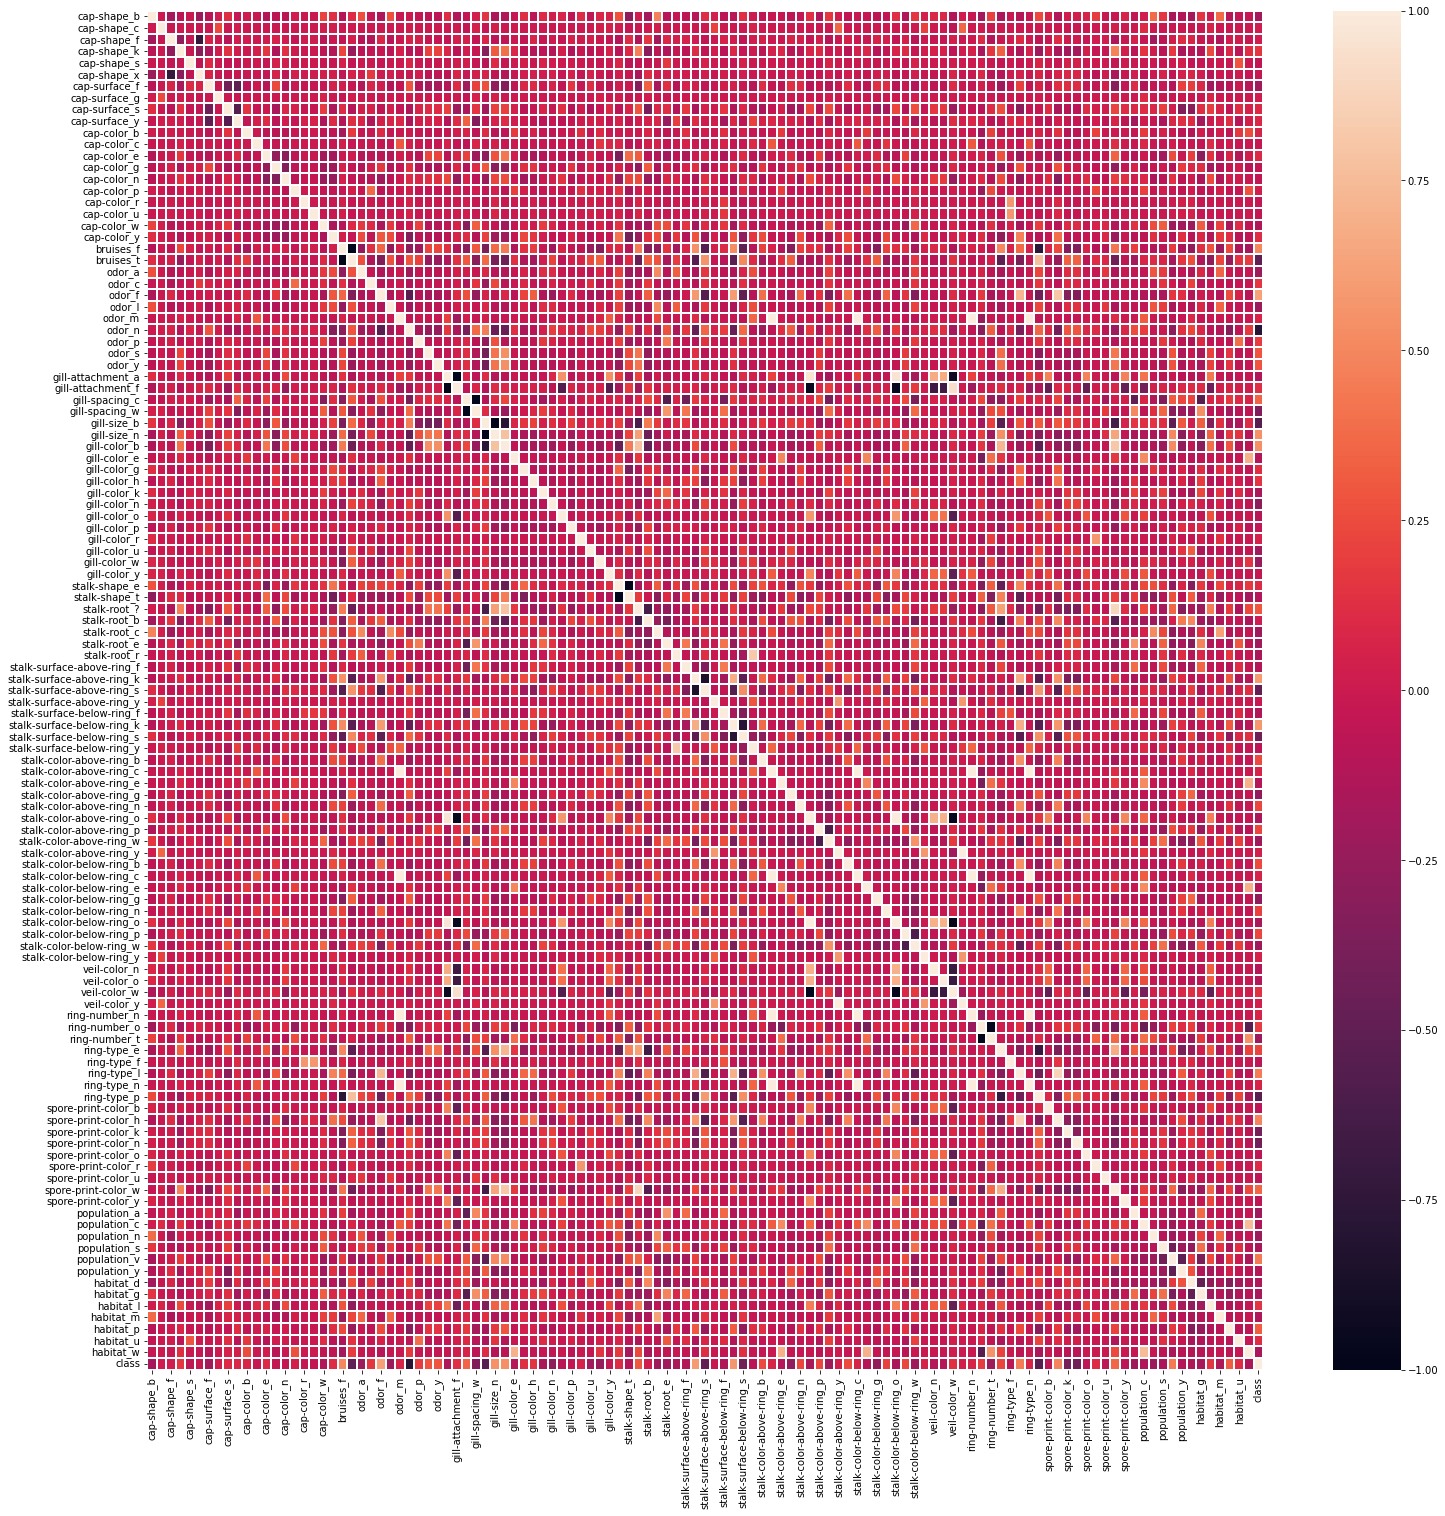

In [31]:
fig, ax = plt.subplots(figsize=(25,25))
# sns.set(rc = {'figure.figsize':(25,28)})
sns.heatmap(data_onehot.corr(), annot=False, linewidths=.2, ax=ax)

In [36]:
data_onehot_edit.corr()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.000000,-0.501530,0.129200,-0.348387,0.540024,-0.102019,-0.182567,0.023007,0.018526,0.163565,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
bruises,-0.501530,1.000000,0.137359,-0.299473,-0.369596,0.099364,0.115686,0.003803,0.045188,-0.229578,...,0.072997,-0.179268,0.162030,0.264457,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507
gill-attachment,0.129200,0.137359,1.000000,0.071489,0.108984,0.186485,-0.122896,0.003615,0.043740,-0.083575,...,0.069399,0.013080,0.084172,0.100905,0.097662,-0.436199,0.031453,0.065947,0.035483,0.025344
gill-spacing,-0.348387,-0.299473,0.071489,1.000000,-0.108333,0.080895,0.039406,0.050573,-0.039154,-0.019591,...,0.347365,-0.308043,-0.226770,-0.217237,0.537841,-0.077632,-0.084739,-0.177670,-0.095595,-0.068279
gill-size,0.540024,-0.369596,0.108984,-0.108333,1.000000,0.214576,-0.148449,0.033174,-0.075766,0.306333,...,-0.119577,0.506475,-0.298685,-0.016064,-0.323808,0.336217,-0.129183,0.170190,0.141152,-0.104090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.155150,-0.278238,-0.436199,-0.077632,0.336217,0.085287,0.010113,0.065707,-0.052326,0.235108,...,-0.143906,0.248675,-0.174539,-0.268668,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,-0.138627,0.228986,0.031453,-0.084739,-0.129183,-0.221048,0.374316,-0.004286,-0.129312,-0.065047,...,0.152473,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,0.323346,-0.249460,0.065947,-0.177670,0.170190,-0.052059,-0.095178,-0.008985,0.021891,0.090538,...,-0.125366,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,0.112078,0.143017,0.035483,-0.095595,0.141152,-0.077334,-0.052871,-0.004835,0.030636,-0.073380,...,0.130450,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


<AxesSubplot:>

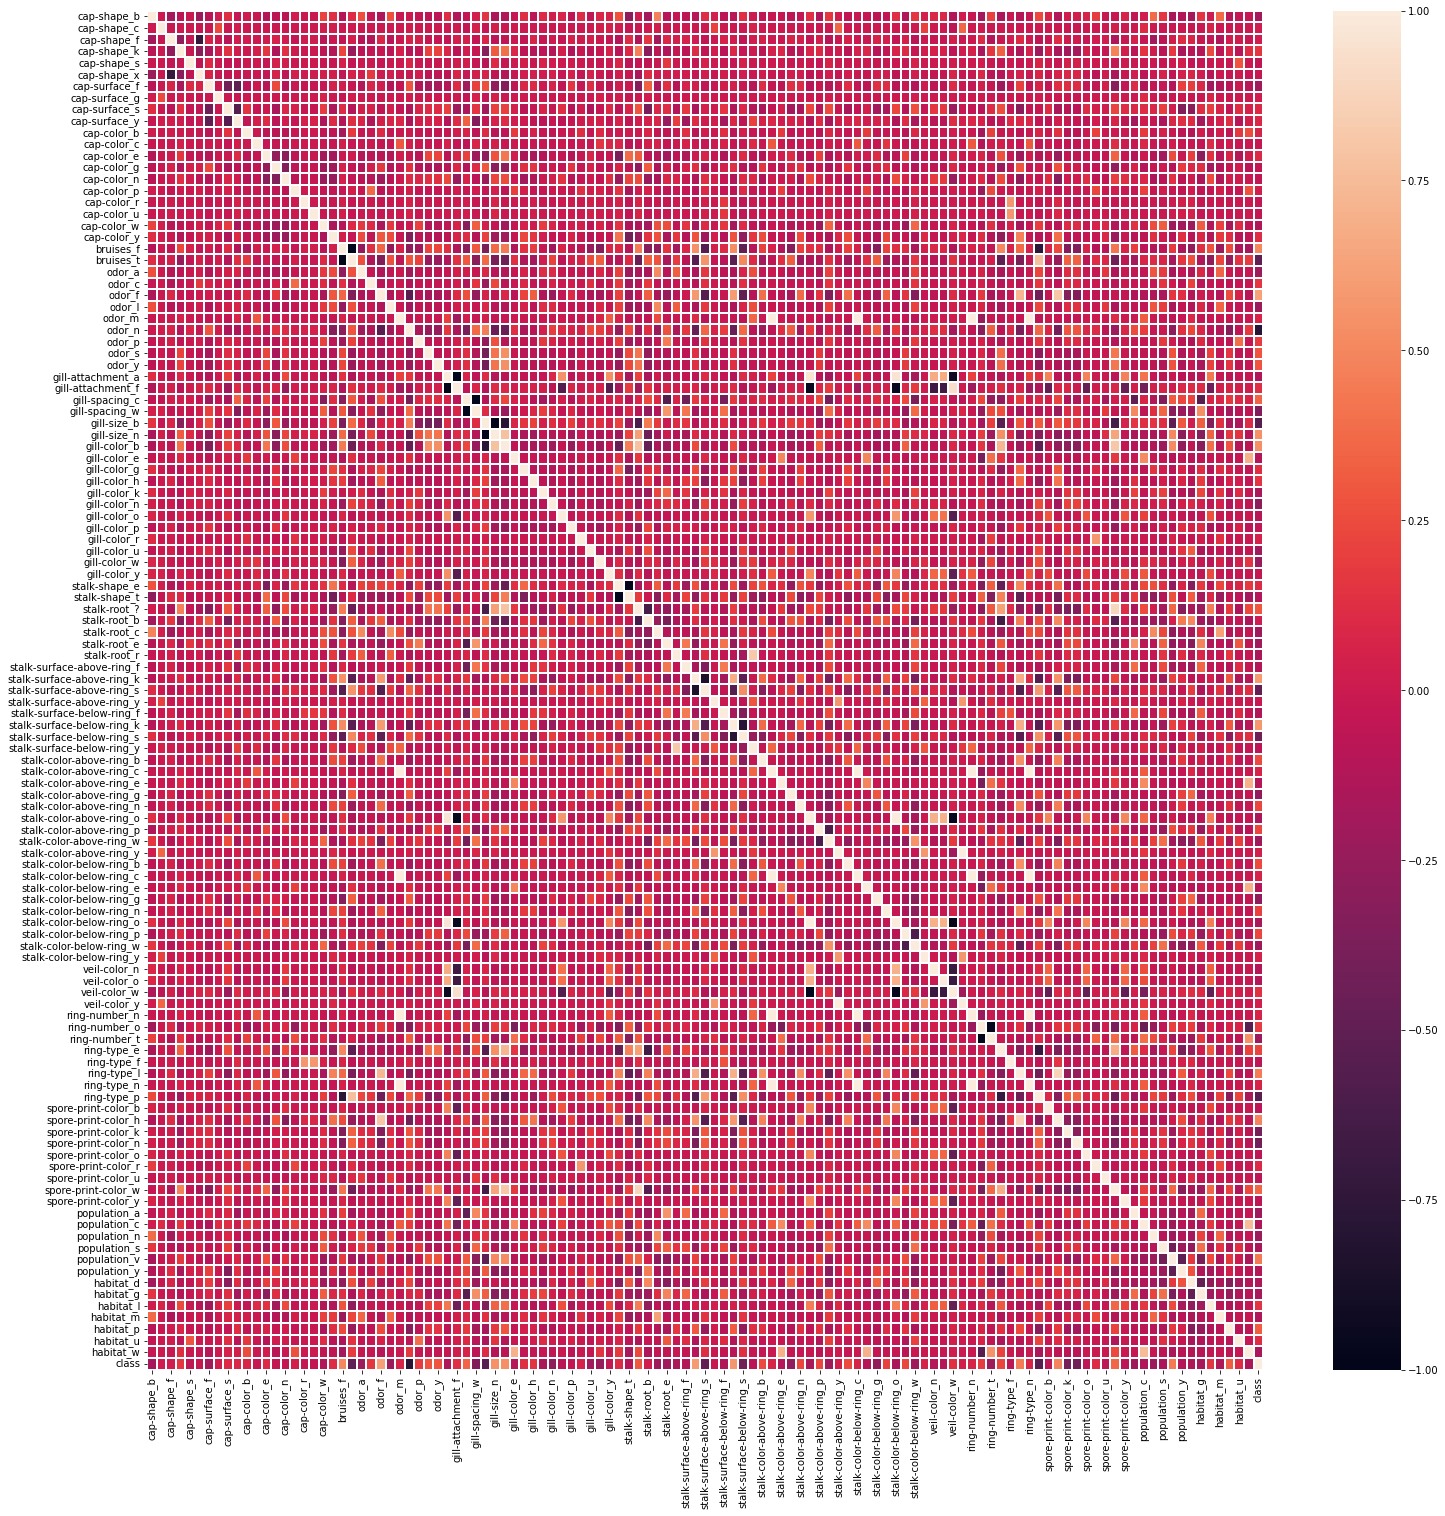

In [33]:
fig, ax = plt.subplots(figsize=(25,25))
# sns.set(rc = {'figure.figsize':(25,28)})
sns.heatmap(data_onehot.corr(), annot=False, linewidths=.2, ax=ax)